[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Mund99/Coursera_Python_Statistics_Financial_Analysis/blob/main/week4.ipynb)

# Association between two random variables 

In [1]:
# import libaries 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
# import hosing data for analysis 
housing = pd.read_csv('data/housing.csv', index_col=0)
housing.head()

# Housing data in Boston 
# LSTAT = Low status population
# INDUS = non-retail business acres per town 
# NOX = Nitric oxides concentration
# RM = Average numbers of Room 
# MEDV = Median value of homes 

,LSTAT,INDUS,NOX,RM,MEDV
0,4.98,2.31,0.538,6.575,24.0
1,9.14,7.07,0.469,6.421,21.6
2,4.03,7.07,0.469,7.185,34.7
3,2.94,2.18,0.458,6.998,33.4
4,5.33,2.18,0.458,7.147,36.2


In [3]:
# Use covariance to calculate the association
housing.cov()

,LSTAT,INDUS,NOX,RM,MEDV
LSTAT,50.994760,29.580270,0.488946,-3.079741,-48.447538
INDUS,29.580270,47.064442,0.607074,-1.887957,-30.520823
NOX,0.488946,0.607074,0.013428,-0.024603,-0.455412
RM,-3.079741,-1.887957,-0.024603,0.493671,4.493446
MEDV,-48.447538,-30.520823,-0.455412,4.493446,84.586724


In [4]:
# Use correlation to calculate the association is more appropriate 
housing.corr()

,LSTAT,INDUS,NOX,RM,MEDV
LSTAT,1.000000,0.603800,0.590879,-0.613808,-0.737663
INDUS,0.603800,1.000000,0.763651,-0.391676,-0.483725
NOX,0.590879,0.763651,1.000000,-0.302188,-0.427321
RM,-0.613808,-0.391676,-0.302188,1.000000,0.695360
MEDV,-0.737663,-0.483725,-0.427321,0.695360,1.000000


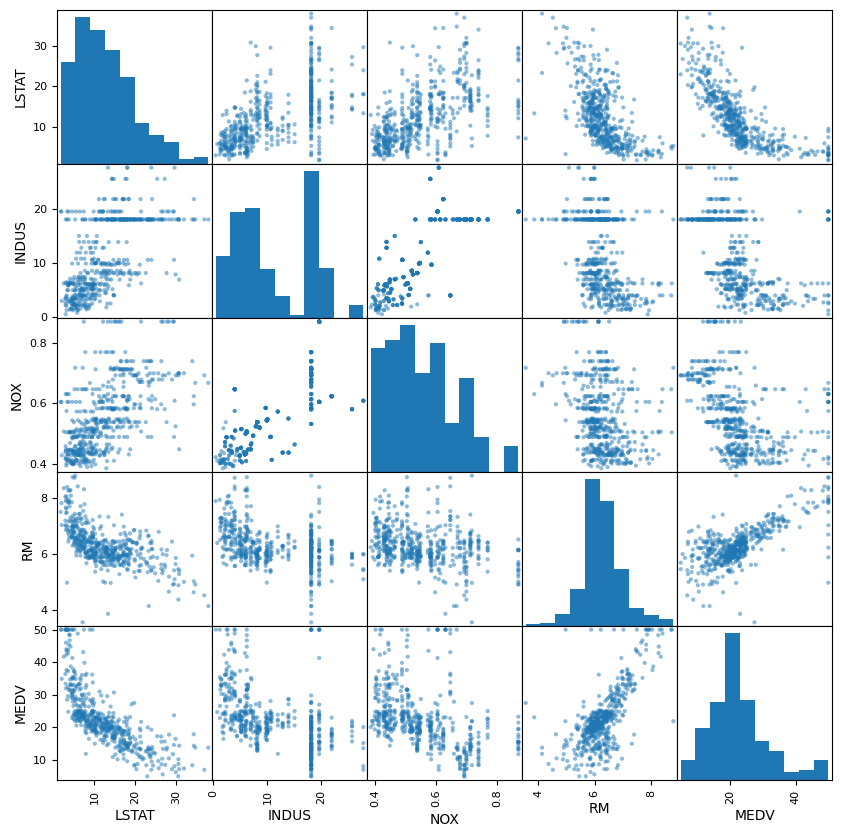

In [5]:
# scatter matrix plot
from pandas.plotting import scatter_matrix
sm = scatter_matrix(housing, figsize=(10, 10))

Seems like there is an positive correlation between MEDV and RM 
Let's look close on the two correlation 

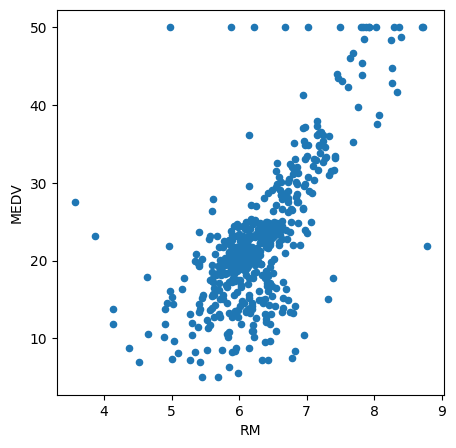

In [6]:
housing.plot(kind='scatter', x='RM', y='MEDV', figsize=(5, 5))
plt.show()

# Simple Linear Regression Model 

In [7]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
housing = pd.read_csv('data/housing.csv', index_col=0)
housing.head()

,LSTAT,INDUS,NOX,RM,MEDV
0,4.98,2.31,0.538,6.575,24.0
1,9.14,7.07,0.469,6.421,21.6
2,4.03,7.07,0.469,7.185,34.7
3,2.94,2.18,0.458,6.998,33.4
4,5.33,2.18,0.458,7.147,36.2


**Simple linear regression**

$y_i = \beta_0 + \beta_1 * x_i + \epsilon_i $

We shall base on the association between RM and MEDV and create a simple linear regression model. Let's use python in estimating the values of B0 and B1 (intercept and slope)

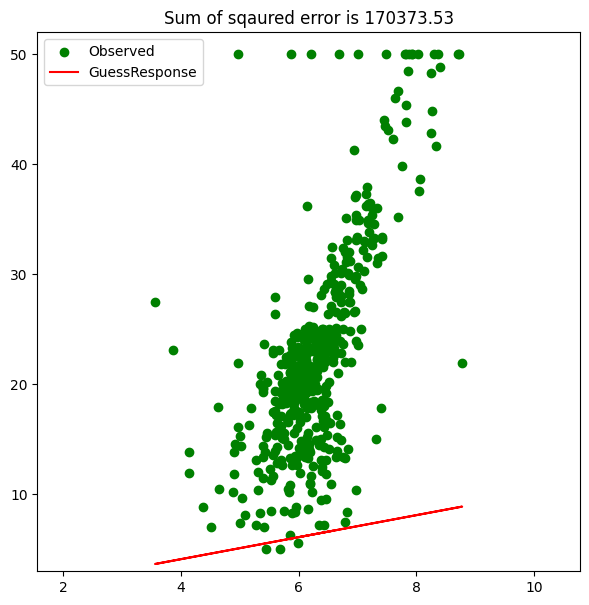

In [9]:
# lets try to guess what are the values of intercept and slope
# Try to assign the value to get a straight line that can describe our data 

intercept_guess = 0.1
coefficient_guess = 1
housing['GuessResponse'] = intercept_guess + coefficient_guess*housing['RM']

# Calculate the error of the guess 
# This show how far is our guess response from the true response
housing['observederror'] = housing['MEDV'] - housing['GuessResponse']


# Plot the estimated line 
plt.figure(figsize=(7, 7))
plt.title('Sum of sqaured error is {}'.format((((housing['observederror'])**2)).sum().round(2)))

plt.scatter(housing['RM'], housing['MEDV'], color='g', label='Observed')
plt.plot(housing['RM'], housing['GuessResponse'], color='red', label='GuessResponse')

plt.legend()
plt.xlim(housing['RM'].min()-2, housing['RM'].max()+2)
plt.ylim(housing['MEDV'].min()-2, housing['MEDV'].max()+2)
plt.show()

## Least sqaure estimates

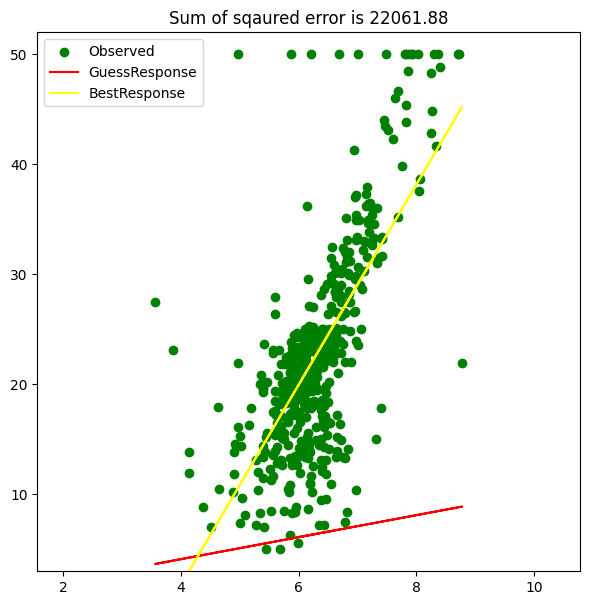

In [10]:
formula = 'MEDV~RM'
# 'MEDV~RM' specify the relationship for the model. 'MEDV' is the dependent variable while
# 'RM' is the independent variable. 

model = smf.ols(formula=formula, data=housing).fit()

# Here are estimated intercept and slope by least square estimation
# Attribute 'params' returns a list of estimated parameters form model
intercept_ols = model.params[0]
coef_ols = model.params[1]

housing['BestResponse'] = intercept_ols + coef_ols*housing['RM']

# Calculate the error 
housing['error'] = housing['MEDV'] - housing['BestResponse']


# Plot the line of best fit 
plt.figure(figsize=(7, 7))
plt.title('Sum of sqaured error is {}'.format((housing['error']**2).sum().round(2)))

plt.scatter(housing['RM'], housing['MEDV'], color='g', label='Observed')
plt.plot(housing['RM'], housing['GuessResponse'], color='red', label='GuessResponse')
plt.plot(housing['RM'], housing['BestResponse'], color='yellow', label='BestResponse')

plt.legend()
plt.xlim(housing['RM'].min()-2, housing['RM'].max()+2)
plt.ylim(housing['MEDV'].min()-2, housing['MEDV'].max()+2)
plt.show()

In [11]:
#Refer to the P-value of RM, Confidence Interval and R-square to evaluate the performance.
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sun, 17 Sep 2023   Prob (F-statistic):           2.49e-74
Time:                        23:46:29   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Diagnostic of linear regression model 

**Assumptions behind linear regression model**
1. Linearity 
2. independence
3. Normality
4. Equal Variance

In [12]:
import pandas as pd 
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
housing = pd.read_csv('data/housing.csv', index_col=0)
# housing.head()

In [14]:
model = smf.ols(formula='MEDV~LSTAT', data=housing).fit()

b0_ols = model.params[0]
b1_ols = model.params[1]

housing['BestResponse'] = b0_ols + b1_ols*housing['LSTAT']

## Linearity

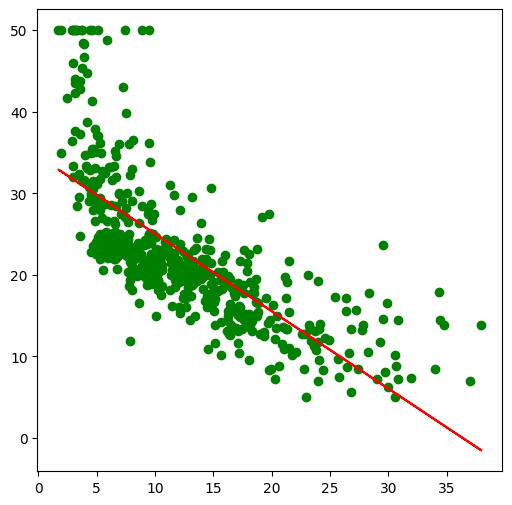

In [15]:
plt.figure(figsize=(6,6))
plt.scatter(housing['LSTAT'], housing['MEDV'], color='g', label='Observed')
plt.plot(housing['LSTAT'], housing['BestResponse'], color='red', label='BestResponse')
plt.show()

## Independence

In [16]:
housing['error'] = housing['MEDV'] - housing['BestResponse']

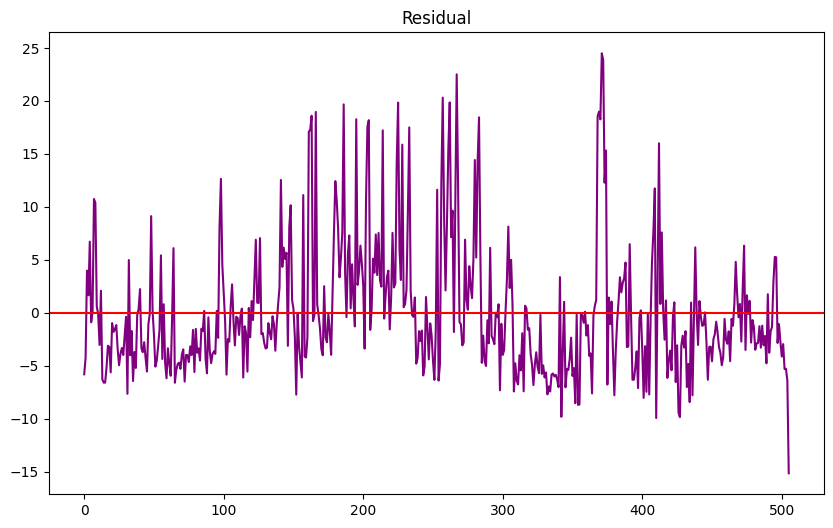

In [17]:
# Method 1: Residual plot 
plt.figure(figsize=(10, 6))
plt.title('Residual')
plt.plot(housing.index, housing['error'], color='purple')
plt.axhline(y=0, color='red')
plt.show()

In [18]:
# Method 2: Durbin Watson Test
# Check the Durbin Watson Statistic
# Rule of thumb: test statistic value in the range of 1.5 to 2.5 are relatively normal
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sun, 17 Sep 2023   Prob (F-statistic):           5.08e-88
Time:                        23:46:29   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Normality

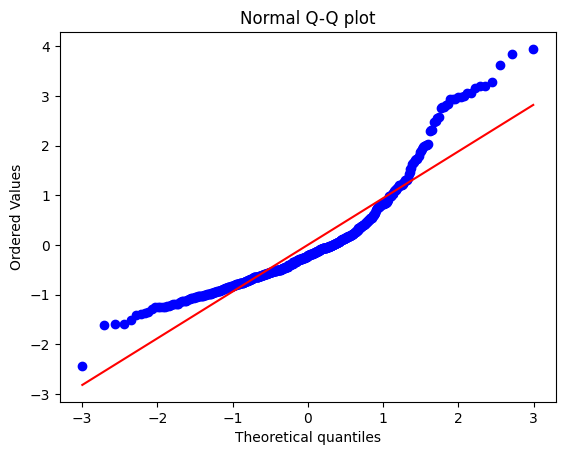

In [19]:
import scipy.stats as stats
z = (housing['error'] - housing['error'].mean())/housing['error'].std(ddof=1)

stats.probplot(z, dist='norm', plot=plt)
plt.title('Normal Q-Q plot')
plt.show()

In [20]:
## Equal variance

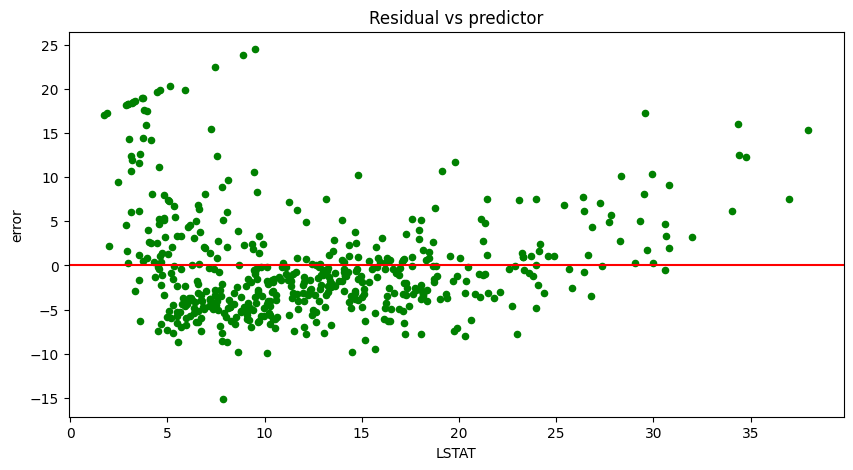

In [21]:
# Residual vs predictor plot
housing.plot(kind='scatter', x='LSTAT', y='error', figsize=(10, 5), color='green')
plt.title('Residual vs predictor')
plt.axhline(y=0, color='red')
plt.show()

## We can see that the regression model (MEDV~LSTAT) violates all four assumptions. Therefore, we cannot make statistical inference using this model.

# Multiple Linear Regression Model 

In [22]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
import warnings
warnings.filterwarnings("ignore")

## Step 1: Obtain Data

In [24]:
# import all stock market data into DataFrame
aord = pd.read_csv('data/indice/ALLOrdinary.csv', index_col='Date')
nikkei = pd.read_csv('data/indice/Nikkei225.csv', index_col='Date')
hsi = pd.read_csv('data/indice/HSI.csv', index_col='Date')
daxi = pd.read_csv('data/indice/DAXI.csv', index_col='Date')
cac40 = pd.read_csv('data/indice/CAC40.csv', index_col='Date')
sp500 = pd.read_csv('data/indice/SP500.csv', index_col='Date')
dji = pd.read_csv('data/indice/DJI.csv', index_col='Date')
nasdaq = pd.read_csv('data/indice/nasdaq_composite.csv', index_col='Date')
spy = pd.read_csv('data/indice/SPY.csv', index_col='Date')

In [25]:
# aord.head()

## Step 2: Scrub Data 

In [26]:
# Due to the timezone issues, we extract and calculate appropriate stock market data for analysis
# Indicepanel is the DataFrame of our trading model
indicepanel=pd.DataFrame(index=spy.index)

indicepanel['spy']=spy['Open'].shift(-1)-spy['Open']
indicepanel['spy_lag1']=indicepanel['spy'].shift(1)
indicepanel['sp500']=sp500["Open"]-sp500['Open'].shift(1)
indicepanel['nasdaq']=nasdaq['Open']-nasdaq['Open'].shift(1)
indicepanel['dji']=dji['Open']-dji['Open'].shift(1)

indicepanel['cac40']=cac40['Open']-cac40['Open'].shift(1)
indicepanel['daxi']=daxi['Open']-daxi['Open'].shift(1)

indicepanel['aord']=aord['Close']-aord['Open']
indicepanel['hsi']=hsi['Close']-hsi['Open']
indicepanel['nikkei']=nikkei['Close']-nikkei['Open']
indicepanel['Price']=spy['Open']

In [27]:
indicepanel.head()

,spy,spy_lag1,sp500,nasdaq,dji,cac40,daxi,aord,hsi,nikkei,Price
Date,,,,,,,,,,,
2008-01-02,-1.619995,NaN,NaN,NaN,NaN,NaN,NaN,-50.100097,-71.679688,NaN,146.529999
2008-01-03,-1.570008,-1.619995,-20.419922,-41.949951,-217.70019,-71.779785,-104.450195,-2.300293,-162.750000,NaN,144.910004
2008-01-04,-1.529998,-1.570008,-3.540039,-40.879883,2.43945,5.489746,-27.990235,NaN,515.349609,-464.320313,143.339996
2008-01-07,0.270004,-1.529998,-29.940064,-56.930176,-245.40918,-111.689941,-102.709961,-27.500000,216.951171,-48.830078,141.809998
2008-01-08,-2.990006,0.270004,1.640015,-7.179931,19.75000,44.509766,33.680176,-33.899902,-354.060547,99.370117,142.080002


In [28]:
# Lets check whether do we have NaN values in indicepanel
indicepanel.isnull().sum()

spy           1
spy_lag1      1
sp500         1
nasdaq        1
dji           1
cac40        30
daxi         53
aord        319
hsi         121
nikkei      145
Price         0
dtype: int64

In [29]:
# We can use method 'fillna()' from dataframe to forward filling the Nan values
# Then we can drop the reminding Nan values
indicepanel = indicepanel.fillna(method='ffill')
indicepanel = indicepanel.dropna()

In [30]:
indicepanel.isnull().sum()

spy         0
spy_lag1    0
sp500       0
nasdaq      0
dji         0
cac40       0
daxi        0
aord        0
hsi         0
nikkei      0
Price       0
dtype: int64

In [31]:
path_save = 'data/indice/indicepanel.csv'
indicepanel.to_csv(path_save)

## Step 3: Split Data 

In [32]:
train = indicepanel.iloc[-2000:-1000, :]
test = indicepanel.iloc[-1000:, :]
print(train.shape, test.shape)

(1000, 11) (1000, 11)


## Step 4: Explore Data 

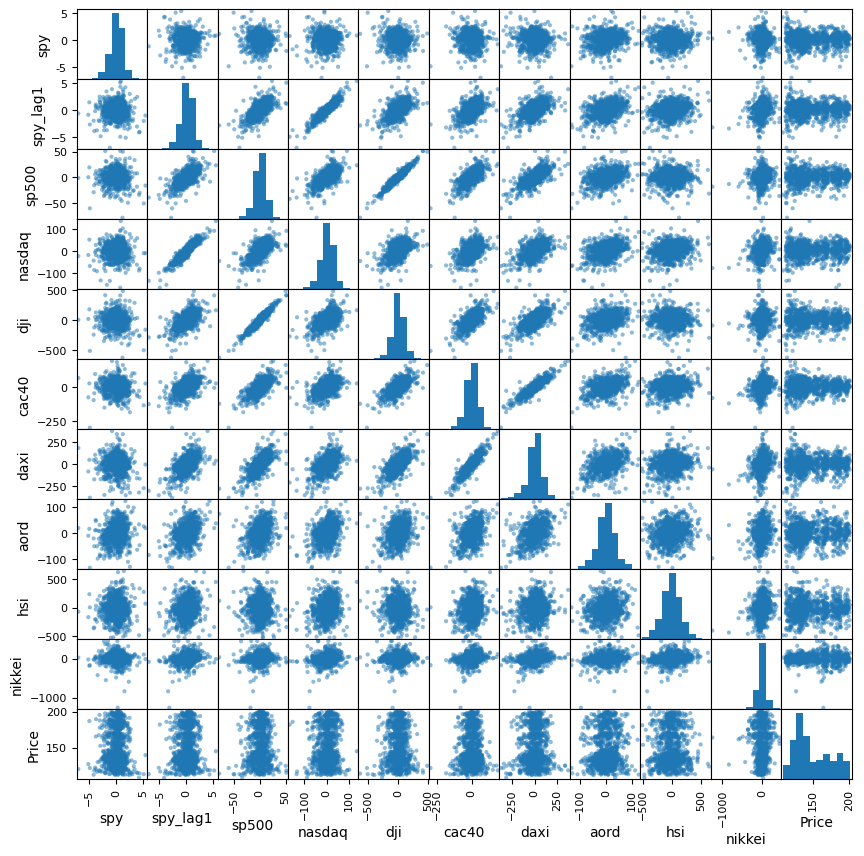

In [33]:
from pandas.plotting import scatter_matrix
sm = scatter_matrix(train, figsize=(10, 10))

plt.show()

In [34]:
corr_array = train.iloc[:, :-1].corr()['spy']
print(corr_array)

spy         1.000000
spy_lag1   -0.011623
sp500      -0.018632
nasdaq      0.012333
dji        -0.037097
cac40      -0.055304
daxi       -0.069735
aord        0.179638
hsi         0.031400
nikkei     -0.035048
Name: spy, dtype: float64


## Step 5: Model Data 

In [35]:
formula = 'spy~spy_lag1+sp500+nasdaq+dji+cac40+aord+daxi+nikkei+hsi'
lm = smf.ols(formula=formula, data=train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    spy   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     7.962
Date:                Sun, 17 Sep 2023   Prob (F-statistic):           1.97e-11
Time:                        23:46:38   Log-Likelihood:                -1617.7
No. Observations:                1000   AIC:                             3255.
Df Residuals:                     990   BIC:                             3305.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0836      0.039      2.138      0.033       0.007       0.160
spy_lag1      -0.1567      0.091     -1.730      0.084      -0.335       0.021
sp500          0.0221      0.014      1.621      0.105      -0.005       0.049
nasdaq         0.0040      0.004      1.066      0.287      -0.003       0.011
dji           -0.0018      0.001     -1.248      0.212      -0.005       0.001
cac40         -0.0003      0.002     -0.153      0.879      -0.004       0.004
aord           0.0093      0.001      7.492      0.000       0.007       0.012
daxi          -0.0025      0.001     -2.387      0.017      -0.005      -0.000
nikkei        -0.0004      0.000     -1.264      0.207      -0.001       0.000
hsi            0.0003      0.000      1.222      0.222      -0.000       0.001
==============================================================================
Omnibus:                       91.018   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              267.687
Skew:                          -0.450   Prob(JB):                     7.45e-59
Kurtosis:                       5.369   Cond. No.                         405.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Step 6: Predict Data 

In [36]:
train['PredictedY'] = lm.predict(train.copy())
test['PredictedY'] = lm.predict(test.copy())

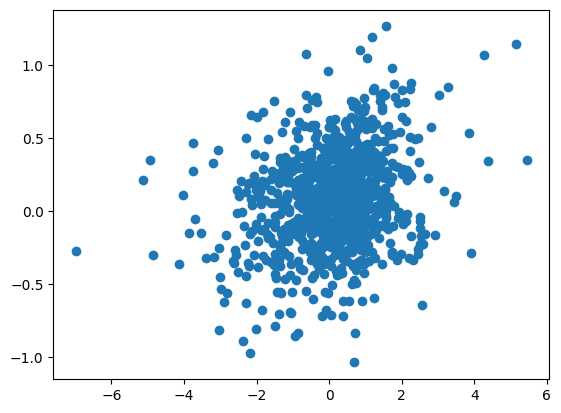

In [37]:
plt.scatter(train['spy'], train['PredictedY']);

## Step 7: Evaluate Data 

In [38]:
# RMSE - Root Mean Squared Error, Adjusted R^2
def adjustedMetric(data, model, model_k, yname):
    data['yhat'] = model.predict(data)
    SST = ((data[yname] - data[yname].mean())**2).sum()
    SSR = ((data['yhat'] - data[yname].mean())**2).sum()
    SSE = ((data[yname] - data['yhat'])**2).sum()
    r2 = SSR/SST
    adjustR2 = 1 - (1-r2)*(data.shape[0] - 1)/(data.shape[0] -model_k -1)
    RMSE = (SSE/(data.shape[0] -model_k -1))**0.5
    return adjustR2, RMSE

# model_k = number of predictors 

In [39]:
def assessTable(test, train, model, model_k, yname):
    r2test, RMSEtest = adjustedMetric(test, model, model_k, yname)
    r2train, RMSEtrain = adjustedMetric(train, model, model_k, yname)
    assessment = pd.DataFrame(index=['R2', 'RMSE'], columns=['Train', 'Test'])
    assessment['Train'] = [r2train, RMSEtrain]
    assessment['Test'] = [r2test, RMSEtest]
    return assessment

In [40]:
# Get the assement table fo our model
assessTable(test, train, lm, 9, 'spy')

,Train,Test
R2,0.059020,0.067248
RMSE,1.226068,1.701291


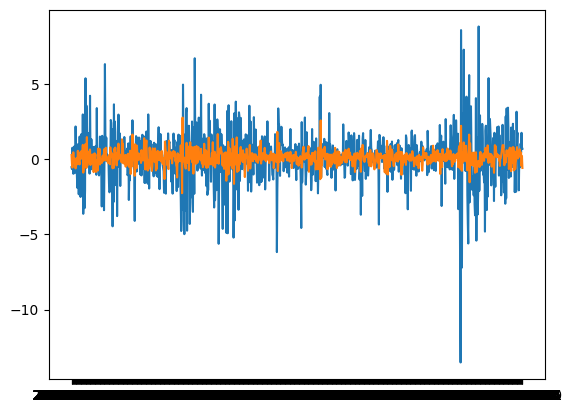

In [41]:
plt.plot(test['spy'])
plt.plot(test['yhat'])
plt.show()

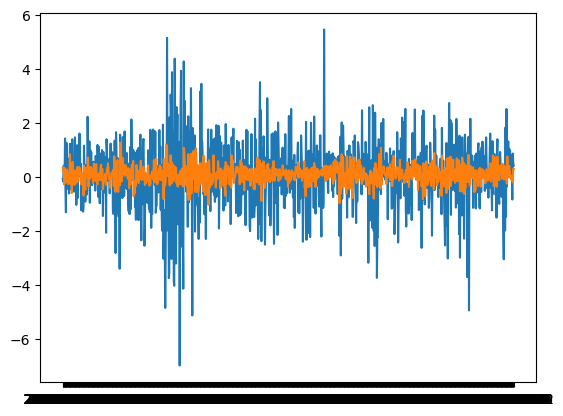

In [42]:
plt.plot(train['spy'])
plt.plot(train['yhat'])
plt.show()

# Evaluate Strategy built from Regression Model

In [43]:
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
import warnings
warnings.filterwarnings("ignore")

In [45]:
indicepanel = pd.read_csv('data/indice/indicepanel.csv', index_col=0)
indicepanel.index = pd.to_datetime(indicepanel.index)
indicepanel.head()

,spy,spy_lag1,sp500,nasdaq,dji,cac40,daxi,aord,hsi,nikkei,Price
Date,,,,,,,,,,,
2008-01-04,-1.529998,-1.570008,-3.540039,-40.879883,2.43945,5.489746,-27.990235,-2.300293,515.349609,-464.320313,143.339996
2008-01-07,0.270004,-1.529998,-29.940064,-56.930176,-245.40918,-111.689941,-102.709961,-27.500000,216.951171,-48.830078,141.809998
2008-01-08,-2.990006,0.270004,1.640015,-7.179931,19.75000,44.509766,33.680176,-33.899902,-354.060547,99.370117,142.080002
2008-01-09,0.589997,-2.990006,-25.459961,-63.119873,-230.69043,-17.109864,-5.270020,-12.900390,768.359375,234.450195,139.089996
2008-01-10,1.100006,0.589997,16.530029,8.270019,142.90039,9.140137,-40.120117,-100.200196,-195.560547,-158.209961,139.679993


In [46]:
Train = indicepanel.iloc[-2000:-1000, :]
Test = indicepanel.iloc[-1000:, :]

formula = 'spy~spy_lag1+sp500+nasdaq+dji+cac40+aord+daxi+nikkei+hsi'
lm = smf.ols(formula=formula, data=Train).fit()

Train['PredictedY'] = lm.predict(Train)
Test['PredictedY'] = lm.predict(Test)

## Perform Trading

In [47]:
# Train
Train['Order'] = [1 if sig>0 else -1 for sig in Train['PredictedY']]
Train['Profit'] = Train['spy'] * Train['Order']

Train['Wealth'] = Train['Profit'].cumsum()
print('Total profit made in Train: ', Train['Profit'].sum())

Total profit made in Train:  214.34009500000042


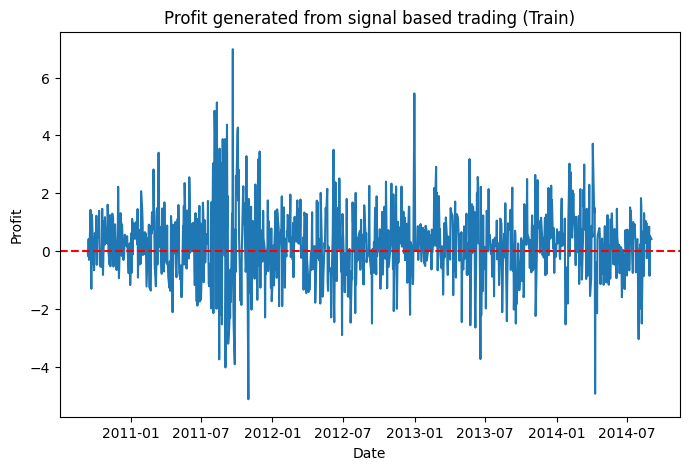

In [48]:
plt.figure(figsize=(8,5))
plt.plot(Train['Profit'])
plt.axhline(y=0, linestyle='--', color='red')

plt.xlabel('Date')
plt.ylabel('Profit')
plt.title('Profit generated from signal based trading (Train)')
plt.show()

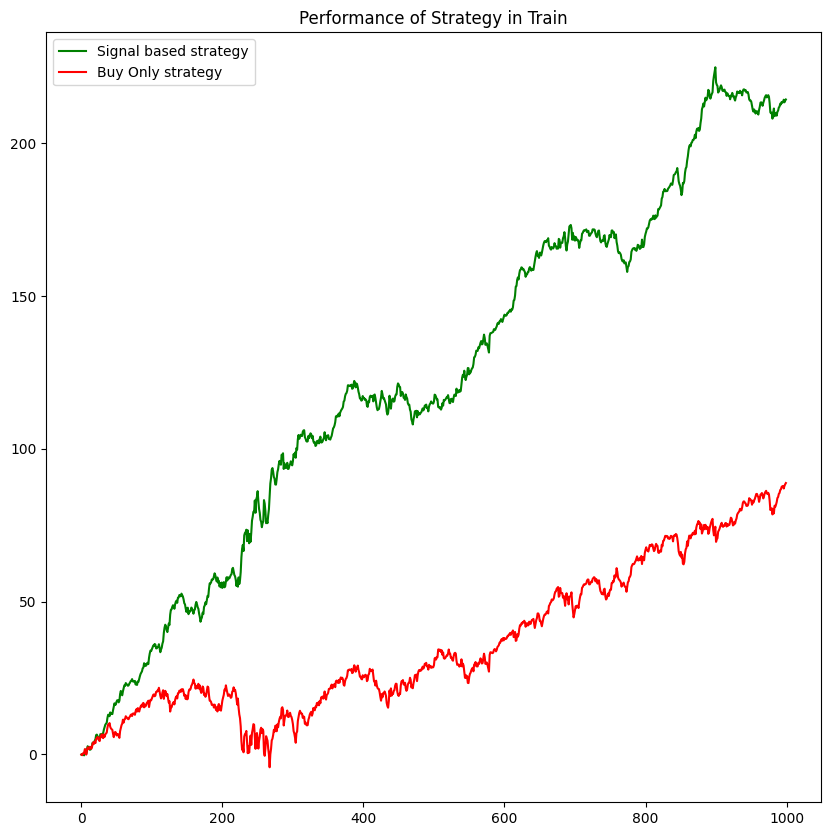

In [49]:
plt.figure(figsize=(10, 10))
plt.title('Performance of Strategy in Train')
plt.plot(Train['Wealth'].values, color='green', label='Signal based strategy')
plt.plot(Train['spy'].cumsum().values, color='red', label='Buy Only strategy')
plt.legend()
plt.show()

In [50]:
# Test
Test['Order'] = [1 if sig>0 else -1 for sig in Test['PredictedY']]
Test['Profit'] = Test['spy'] * Test['Order']

Test['Wealth'] = Test['Profit'].cumsum()
print('Total profit made in Test: ', Test['Profit'].sum())

Total profit made in Test:  241.0300879999996


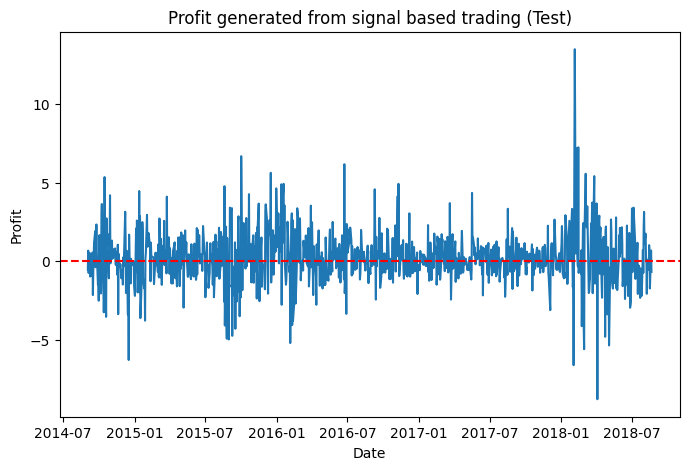

In [51]:
plt.figure(figsize=(8,5))
plt.plot(Test['Profit'])
plt.axhline(y=0, linestyle='--', color='red')

plt.xlabel('Date')
plt.ylabel('Profit')
plt.title('Profit generated from signal based trading (Test)')
plt.show()

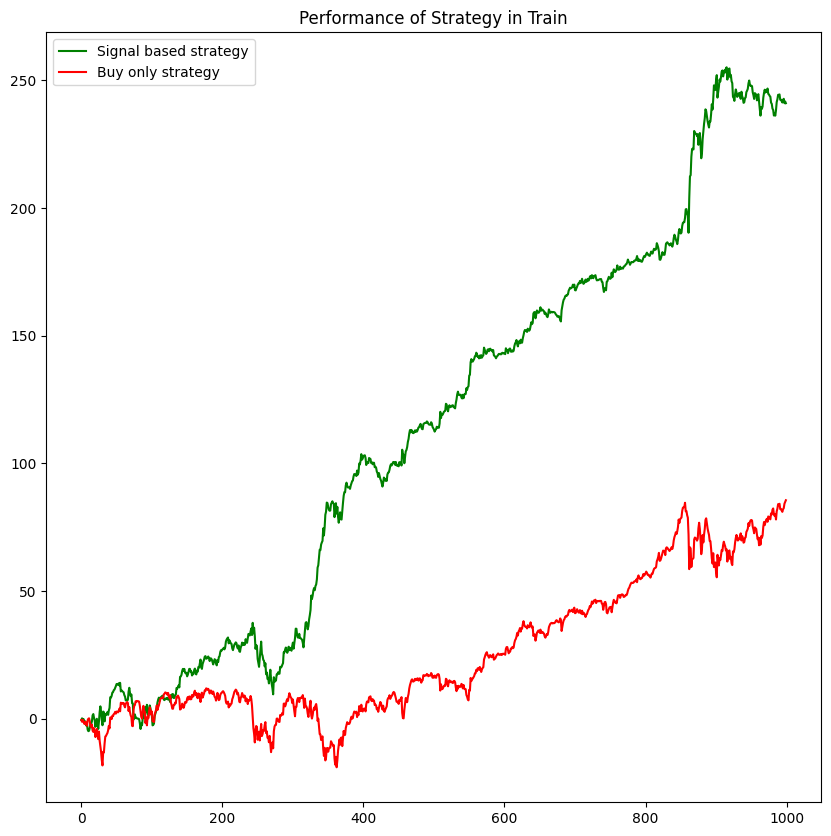

In [52]:
plt.figure(figsize=(10, 10))
plt.title('Performance of Strategy in Train')
plt.plot(Test['Wealth'].values, color='green', label='Signal based strategy')
plt.plot(Test['spy'].cumsum().values, color='red', label='Buy only strategy')
plt.legend()
plt.show()

## Evaluation of model
1. Sharpe Ratio
2. Maximum Drawdown
3. CAGR%

In [53]:
Train['Wealth'] = Train['Wealth'] + Train.loc[Train.index[0], 'Price']
Test['Wealth'] = Test['Wealth'] + Test.loc[Test.index[0], 'Price']

In [54]:
# Sharpe Ratio on Train data
Train['Return'] = np.log(Train['Wealth']) - np.log(Train['Wealth'].shift(1))
dailyr = Train['Return'].dropna()

print(f'Daily Sharpe Ratio is {dailyr.mean()/dailyr.std(ddof=1):.4f}')
print(f'Yearly Sharpe Ratio is {(252**0.5)*dailyr.mean()/dailyr.std(ddof=1):.4f}')

Daily Sharpe Ratio is 0.1797
Yearly Sharpe Ratio is 2.8519


In [55]:
# Sharpe Ratio in Test data
Test['Return'] = np.log(Test['Wealth']) - np.log(Test['Wealth'].shift(1))
dailyr = Test['Return'].dropna()

print(f'Daily Sharpe Ratio is {dailyr.mean()/dailyr.std(ddof=1):.4f}')
print(f'Yearly Sharpe Ratio is {(252**0.5)*dailyr.mean()/dailyr.std(ddof=1):.4f}')

Daily Sharpe Ratio is 0.1304
Yearly Sharpe Ratio is 2.0693


In [56]:
# Maximum Drawdown in Train data
Train['Peak'] = Train['Wealth'].cummax()
Train['Drawdown'] = (Train['Peak'] - Train['Wealth'])/Train['Peak']
print(f"Maximum Drawdown in Train is {Train['Drawdown'].max()*100:.4f}%.")

Maximum Drawdown in Train is 6.0690%.


In [57]:
# Maximum Drawdown in Test data
Test['Peak'] = Test['Wealth'].cummax()
Test['Drawdown'] = (Test['Peak'] - Test['Wealth'])/Test['Peak']
print(f"Maximum Drawdown in Test is {Test['Drawdown'].max()*100:.4f}%.")

Maximum Drawdown in Test is 11.7199%.


In [58]:
# CAGR in Train data 
initial_investment = Train['Wealth'].iloc[0]
start_date = pd.to_datetime(Train.index[0])

# Calculate the number of days between start_date and each row's date
Train['days_investment'] = (pd.to_datetime(Train.index) - start_date).days

# Calculate CAGR for each row using vectorized operations
Train['cagr'] = (
    ((Train['Wealth'] / initial_investment) ** (365 / Train['days_investment']) - 1) * 100
)

print(f"CAGR in Train: {Train['cagr'].iloc[-1]:.2f}%")

CAGR in Train: 30.80%


In [59]:
# CAGR in Test data 
initial_investment = Test['Wealth'].iloc[0]
start_date = pd.to_datetime(Test.index[0])

# Calculate the number of days between start_date and each row's date
Test['days_investment'] = (pd.to_datetime(Test.index) - start_date).days

# Calculate CAGR for each row using vectorized operations
Test['cagr'] = (
    ((Test['Wealth'] / initial_investment) ** (365 / Test['days_investment']) - 1) * 100
)

print(f"CAGR in Test: {Test['cagr'].iloc[-1]:.2f}%")

CAGR in Test: 22.03%
